# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# A simple model

<IPython.core.display.Javascript object>


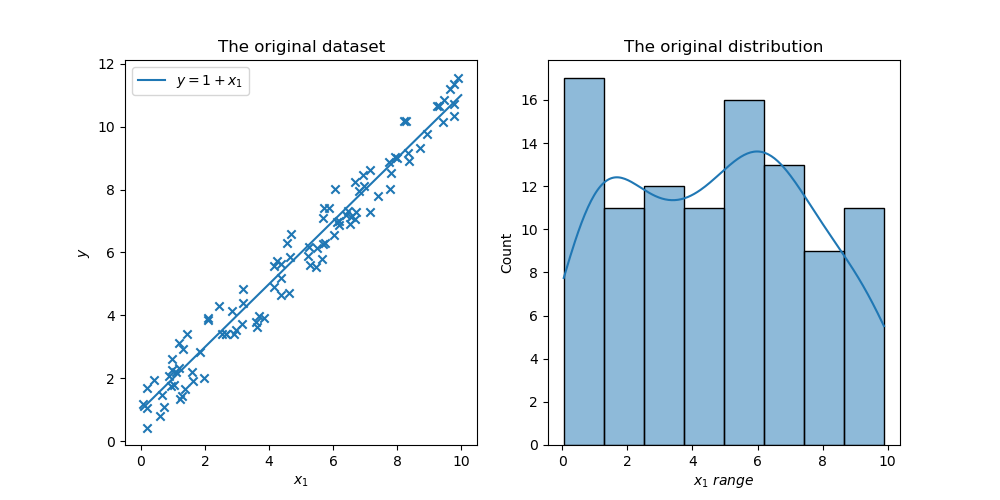

,$x_1$,target
0,5.488135,6.132502
1,7.151894,8.611878
2,6.027634,6.557246
3,5.448832,5.524455
4,4.236548,5.739042
...,...,...
95,1.831914,2.850996
96,5.865129,7.410300
97,0.201075,1.692362
98,8.289400,10.173342


In [5]:
rng = np.random.RandomState(0)


X = rng.rand(100,1)*10

w_true = np.array([1,1]).reshape(-1,1)
random_error = rng.rand(100,1).reshape(-1, 1)*(-2)+1
y = X * w_true[0] + w_true[1] +  random_error

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(X,y,marker='x')
x = np.linspace(0,10,10)
plt.plot(x,x+1,label='$y = 1 + x_1$')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()
plt.title('The original dataset')

plt.subplot(1,2,2)
sns.histplot(X,kde=True,legend=False)
plt.xlabel('$x_1\ range$')
plt.title('The original distribution')

X_df = pd.DataFrame(data=np.c_[X,y],columns=["$x_1$",'target'])
X_df.head(n=len(X))

In [6]:
X_df.describe()

,$x_1$,target
count,100.000000,100.000000
mean,4.727938,5.671775
std,2.897540,2.986333
min,0.046955,0.439978
25%,2.058032,3.395038
50%,4.674810,5.768314
75%,6.844833,7.969377
max,9.883738,11.558753


In [7]:
X = np.insert(X,0,np.ones(X.shape[0]),axis=1)

# Feature Scaling

In [8]:
# Standardization
def MinMaxScaler(X):
    """transform features by scaling each feature to a given range.

    :param X: 2D array to be scaled
    :param X_min: minimum value of the range
    :param X_max: maximum value of the range
    :return: scaled 2D array
    """
    X_ndarray = np.array(X)
    if len(X_ndarray.shape) != 2:
        raise ValueError('X must be a 2D matrix.')
    for column in np.arange(X_ndarray.shape[1]): 
        if np.amin(X_ndarray[:,column]) == np.amax(X_ndarray[:,column]) :
            continue
        if np.amin(X_ndarray[:,column]) > -1 and np.amax(X_ndarray[:,column]) < 1:
            continue
        X_ndarray[:,column] = (X_ndarray[:,column] - np.mean(X_ndarray[:,column])) / (np.amax(X_ndarray[:,column]) - np.amin(X_ndarray[:,column]))
    return X_ndarray

# Normalization
def normalizer(X):
    """Normalizing the elements of a 2D array

        :param X: 2D array to be normalized
        :return: normalized 2D array
    """
    X_ndarray = np.array(X)
    # check the inputs
    if len(X_ndarray.shape) != 2:
        raise ValueError('X must be a 2D matrix.')
    # main body
    for column in np.arange(X_ndarray.shape[1]): 
        if column == 0:
            continue
        u = np.sum(X_ndarray[:,column]) / X_ndarray.shape[0]
        s = np.sqrt(np.sum((X_ndarray[:,column] - u)**2) / X_ndarray.shape[0])
        if np.amin(X_ndarray[:,column]) == np.amax(X_ndarray[:,column]):
            X_ndarray[:,column] = X_ndarray[:,column]-u
        else: 
            X_ndarray[:,column] = (X_ndarray[:,column]-u)/s
    return X_ndarray


X_scaled = normalizer(X)
X_minmax = MinMaxScaler(X)


# Visualization

<IPython.core.display.Javascript object>


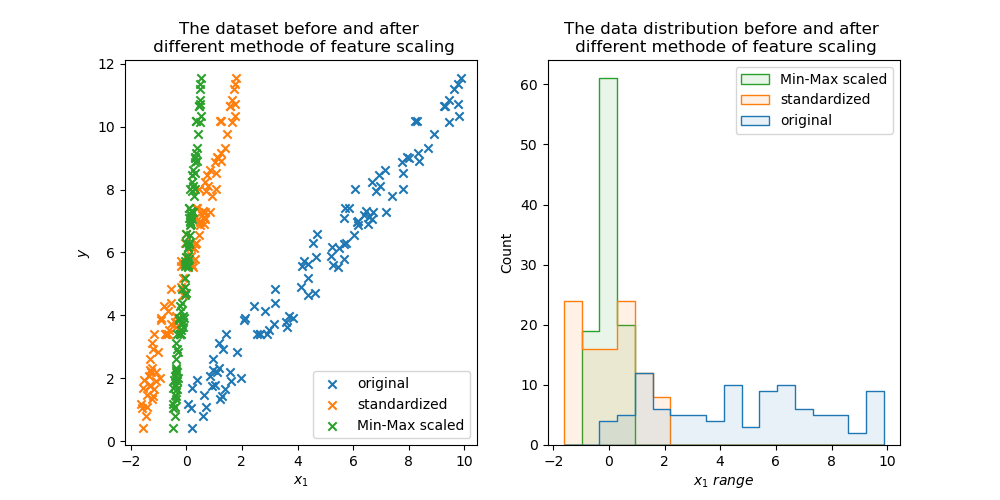

Text(0.5, 0, '$x_1\\ range$')

In [9]:

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,1],y,label='original',marker='x')
plt.scatter(X_scaled[:,1],y,label='standardized',marker='x')
plt.scatter(X_minmax[:,1],y,label='Min-Max scaled',marker='x')


plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.title('The dataset before and after \n different methode of feature scaling')
plt.legend()

plt.subplot(1,2,2)
sns.histplot([X[:,1],X_scaled[:,1],X_minmax[:,1]],legend=True,alpha=0.1,element="step")

plt.title('The data distribution before and after \n different methode of feature scaling')
plt.legend(['Min-Max scaled','standardized','original'])
plt.xlabel('$x_1\ range$')

# cost finction

In [10]:
# cost function
loss = lambda w: (y - X @ w).T @ (y - X @ w)
dloss = lambda w: 2 * X.T @ (X @ w - y)

# cost function scaled
loss_scaled = lambda w: (y - X_scaled @ w).T @ (y - X_scaled @ w)
dloss_scaled = lambda w: 2 * X_scaled.T @ (X_scaled @ w - y)


# cost function minmax
loss_minmax = lambda w: (y - X_minmax @ w).T @ (y - X_minmax @ w)
dloss_minmax = lambda w: 2 * X_minmax.T @ (X_minmax @ w - y)

# loss_scaled = lambda w: (y - X_scaled @ (w+ np.array((5551-100,8883-100)).reshape(2,1))).T @ (y - X_scaled @ (w+ np.array((5551,8883-100)).reshape(2,1)))
# dloss_scaled = lambda w: 2 * X_scaled.T @ (X_scaled @ (w+ np.array((5551-100,8883-100)).reshape(2,1)) - y)


# Gradient descent

In [11]:
# ******************************************************************************
# initial value
w00, w01, = -10, -10
w0 = np.array([w00,w01]).reshape(-1,1)
initial_position = w0


#settings
max_iter = 20000000
precision  = 0.00001
learning_rate = 0.0001
# ****************************************************************************

def gradient_descent_step(df,learning_rate,current_position):
    """calculate the iteration
    
    Input:
    -df:gradient of the function
    -learning_rate: the step size
    -current_position: the value to be substituted into the iterative formula
    
    Output:
    -new_position: the output value of the iterative formula
    """
    
    new_position = current_position - learning_rate * df(current_position)

    return new_position


def update_history(history,f,current_position,change_f):
    """ update history array 
    
    Input:
    -history: the container to save the data
    -f:funcion to be minimized
    -current_position:current w position
    -change_f:the change of function value
    """
    history.append([current_position, f, change_f])

# Training

In [12]:
history=[]
change_f = float('inf')
iteration=0

current_position = initial_position
update_history(history,loss(current_position),current_position,change_f)

while (iteration<=max_iter) and (np.abs(change_f)>precision):
    new_position = gradient_descent_step(dloss,learning_rate,current_position)
    iteration += 1
    change_f =  loss(current_position) - loss(new_position)
    current_position = new_position
    update_history(history,loss(current_position),current_position,change_f)

In [13]:
print(f"Initial position = \n{initial_position}, \n{loss(initial_position)}")
print(f"wmin, loss(wmin)    = \n{current_position}, \n{loss(current_position)}")
print("Last change = %1.9f" %change_f)
print("Nr. Iterations = ",iteration-1)


Initial position = 
[[-10]
 [-10]], 
[[497120.06813478]]
wmin, loss(wmin)    = 
[[0.87797253]
 [1.0136023 ]], 
[[30.49423165]]
Last change = 0.000009961
Nr. Iterations =  1380


In [14]:
history_scaled=[]
change_f_scaled = float('inf')
iteration_scaled=0

current_position_scaled = initial_position
update_history(history_scaled,loss_scaled(current_position_scaled),current_position_scaled,change_f_scaled)

while (iteration_scaled<=max_iter) and (np.abs(change_f_scaled)>precision):
    new_position_scaled = gradient_descent_step(dloss_scaled,learning_rate,current_position_scaled)
    iteration_scaled += 1
    change_f_scaled =  loss_scaled(current_position_scaled) - loss_scaled(new_position_scaled)
    current_position_scaled = new_position_scaled
    update_history(history_scaled,loss_scaled(current_position_scaled),current_position_scaled,change_f_scaled)

In [15]:
print(f"Initial position = \n{initial_position}, \n{loss_scaled(initial_position)}")
print(f"wmin, loss(wmin)    = \n{current_position_scaled}, \n{loss_scaled(current_position_scaled)}")
print("Last ch ange = %1.9f" %change_f_scaled)
print("Nr. Iterations = ",iteration_scaled-1)

Initial position = 
[[-10]
 [-10]], 
[[41282.55486906]]
wmin, loss(wmin)    = 
[[5.67059626]
 [2.91862927]], 
[[30.49353165]]
Last ch ange = 0.000009621
Nr. Iterations =  469


In [16]:
history_minmax=[]
change_f_minmax = float('inf')
iteration_minmax=0

current_position_minmax = initial_position
update_history(history_minmax,loss_minmax(current_position_minmax),current_position_minmax,change_f_minmax)

while (iteration_minmax<=max_iter) and (np.abs(change_f_minmax)>precision):
    new_position_minmax = gradient_descent_step(dloss_minmax,learning_rate,current_position_minmax)
    iteration_minmax += 1
    change_f_minmax =  loss_minmax(current_position_minmax) - loss_minmax(new_position_minmax)
    current_position_minmax = new_position_minmax
    update_history(history_minmax,loss_minmax(current_position_minmax),current_position_minmax,change_f_minmax)

In [17]:
print(f"Initial position = \n{initial_position}, \n{loss_minmax(initial_position)}")
print(f"wmin, loss(wmin)    = \n{current_position_minmax}, \n{loss_minmax(current_position_minmax)}")
print("Last ch ange = %1.9f" %change_f_minmax)
print("Nr. Iterations = ",iteration_minmax-1)

Initial position = 
[[-10]
 [-10]], 
[[28013.72644672]]
wmin, loss(wmin)    = 
[[5.67177488]
 [9.94324882]], 
[[30.49619437]]
Last ch ange = 0.000009976
Nr. Iterations =  4065


# Plot Loss function

<IPython.core.display.Javascript object>


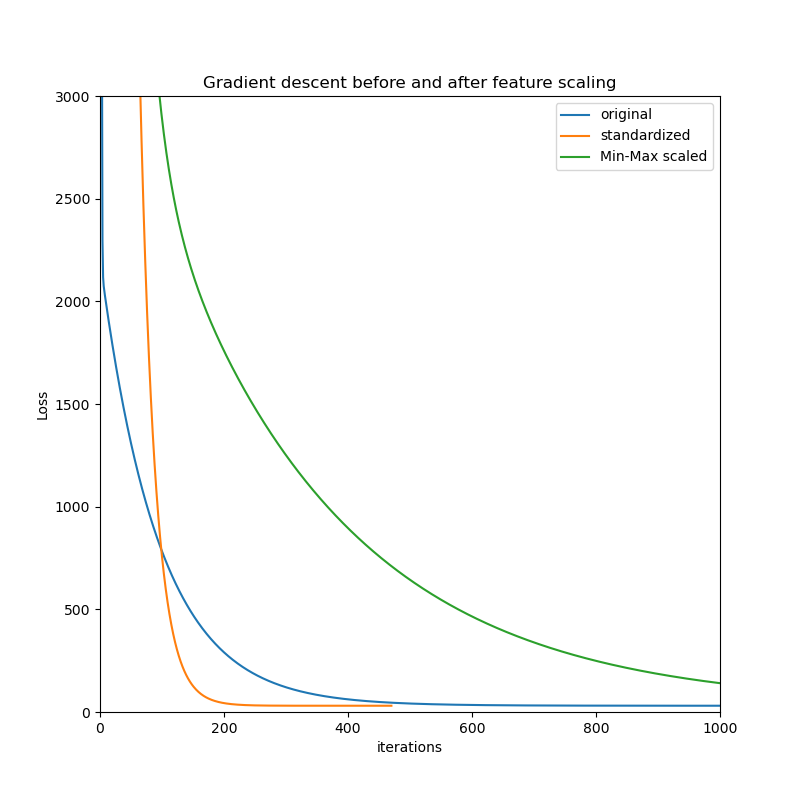

(0.0, 3000.0)

In [18]:

plt.figure(figsize=(8,8))

f_array = []
itr = np.arange(len(history))
for _,f,_ in history:
    f_array.append(f.flatten())
plt.plot(itr, f_array,label='original')

f_array_scaled = []
itr_scaled = np.arange(len(history_scaled))
for _,f_scaled,_ in history_scaled:
    f_array_scaled.append(f_scaled.flatten())
plt.plot(itr_scaled, f_array_scaled,label='standardized')

f_array_minmax = []
itr_minmax = np.arange(len(history_minmax))
for _,f_minmax,_ in history_minmax:
    f_array_minmax.append(f_minmax.flatten())
plt.plot(itr_minmax, f_array_minmax,label='Min-Max scaled')

plt.legend()
plt.title('Gradient descent before and after feature scaling')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.xlim(0,1000)
plt.ylim(0,3000)

# Plot hypothesis and ground true.

<IPython.core.display.Javascript object>


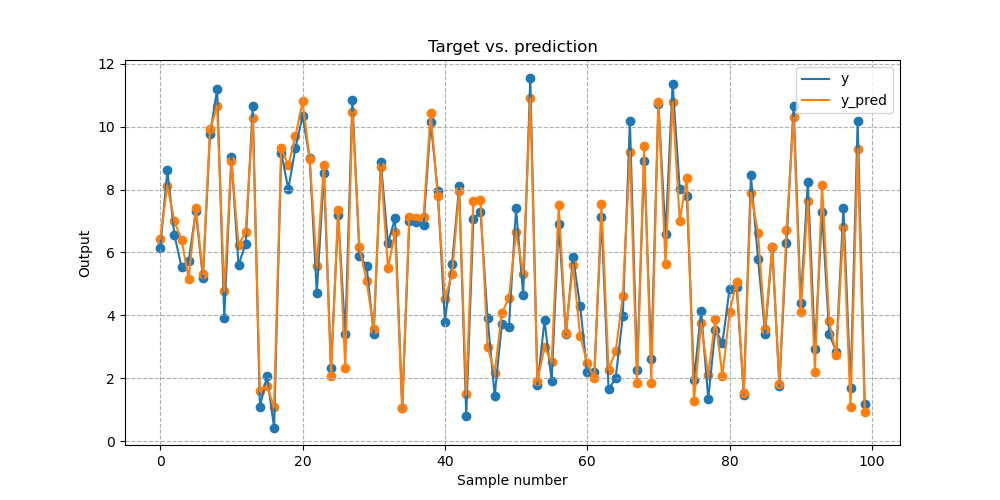

In [19]:
plt.figure(figsize=(10,5)) 
Nr_sample = np.arange(0,X.shape[0])

wmin = current_position
h = lambda X: X @ wmin

y_pred = h(X)

l, = plt.plot(Nr_sample,y)
plt.scatter(Nr_sample,y,marker='o')

l_pred, = plt.plot(Nr_sample,y_pred)
plt.scatter(Nr_sample,y_pred,marker='o')

plt.grid(True, linestyle='--')
plt.xlabel('Sample number')
plt.ylabel('Output')
plt.title('Target vs. prediction')
plt.legend(handles=[l,l_pred],labels=['y','y_pred'],loc='best')


# Loss surface

<IPython.core.display.Javascript object>


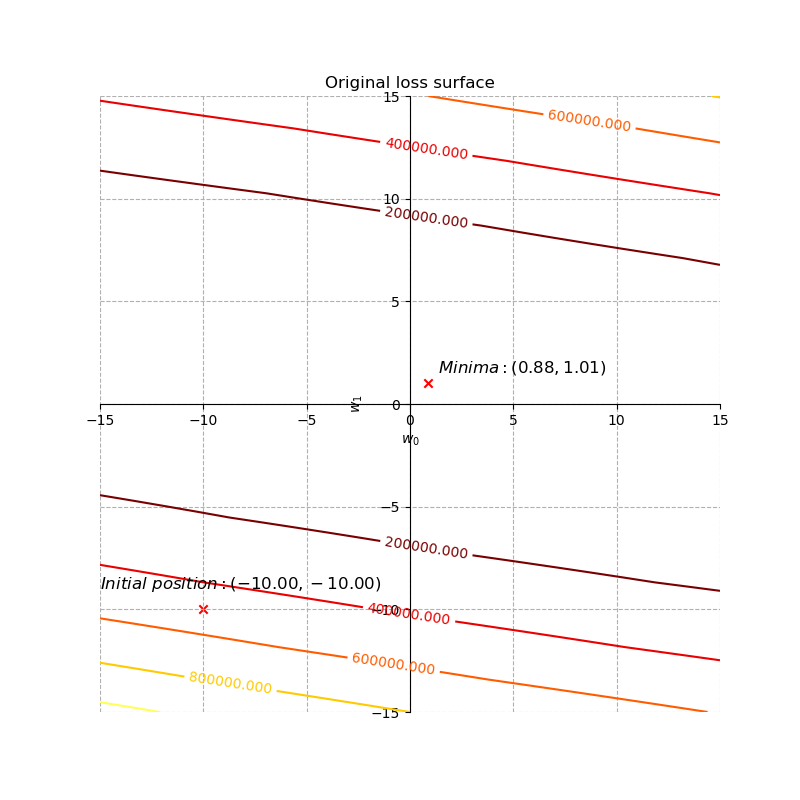

<IPython.core.display.Javascript object>


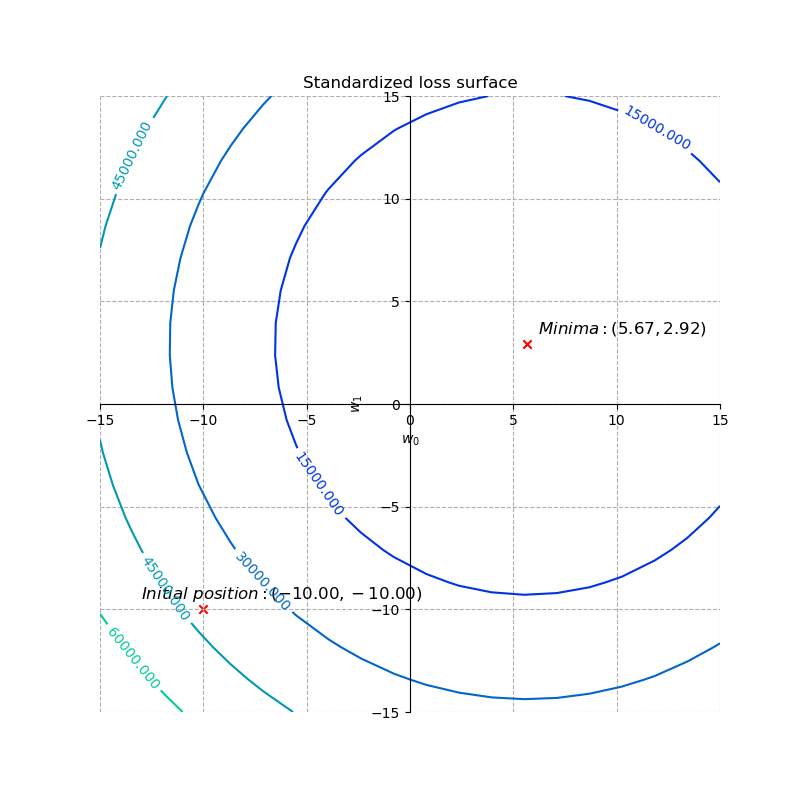

In [20]:
 
f_loss = lambda w: (y - X @ w).transpose(0,2,1) @ (y - X @ w)
f_loss_scaled = lambda w: (y - X_scaled @ w).transpose(0,2,1) @ (y - X_scaled @ w)


# original 
# ************************************************
resolution = 20
w_range = np.linspace(-15,15,resolution)
w0,w1 = np.meshgrid(w_range, w_range)
w = np.dstack((w0, w1)).reshape(-1,2,1)
y_loss = f_loss(w).reshape(resolution,-1)

plt.figure(figsize=(8,8))
ax = plt.axes()
plt.grid(True, linestyle='--')
CS = plt.contour(w0, w1, y_loss,5,cmap='hot')
plt.clabel(CS, inline=1, fontsize=10)


plt.scatter(current_position[0],current_position[1],marker='x',color='red')
plt.annotate(f'$Minima:({current_position[0][0]:.2f},{current_position[1][0]:.2f})$', 
             xy=(current_position[0]+0.5,current_position[1]+0.5),
             size=12)


plt.scatter(initial_position[0],initial_position[1],marker='x',color='red')
plt.annotate(f'$Initial\ position:({initial_position[0][0]:.2f},{initial_position[1][0]:.2f})$', 
             xy=(initial_position[0]-5,initial_position[1]+1),
            size=12)

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Original loss surface')

ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# ****************************************************





# standardized 
# ************************************************
resolution = 20
w_range = np.linspace(-15,15,resolution)
w0,w1 = np.meshgrid(w_range, w_range)
w = np.dstack((w0, w1)).reshape(-1,2,1)
y_loss_scaled = f_loss_scaled(w).reshape(resolution,-1)


plt.figure(figsize=(8,8))
ax = plt.axes()
plt.grid(True, linestyle='--')
CS = plt.contour(w0, w1, y_loss_scaled,5,cmap='winter')
plt.clabel(CS, inline=1, fontsize=10)


plt.scatter(current_position_scaled[0],current_position_scaled[1],marker='x',color='red')
plt.annotate(f'$Minima:({current_position_scaled[0][0]:.2f},{current_position_scaled[1][0]:.2f})$', 
             xy=(current_position_scaled[0]+0.5,current_position_scaled[1]+0.5),
             size=12)


plt.scatter(initial_position[0],initial_position[1],marker='x',color='red')
plt.annotate(f'$Initial\ position:({initial_position[0][0]:.2f},{initial_position[1][0]:.2f})$', 
             xy=(initial_position[0]-3,initial_position[1]+0.5),
            size=12)

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Standardized loss surface')

ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# ****************************************************






# # Min-Max 
# # ************************************************
# resolution = 20
# w_range = np.linspace(-4,6,resolution)
# w0,w1 = np.meshgrid(w_range, w_range)
# w = np.dstack((w0, w1)).reshape(-1,2,1)
# y_loss = f_loss(w).reshape(resolution,-1)

# plt.figure(figsize=(8,8))
# plt.grid(True, linestyle='--')
# CS = plt.contour(w0, w1, y_loss,5,cmap='rainbow')
# plt.clabel(CS, inline=1, fontsize=10)


# plt.scatter(current_position[0],current_position[1],marker='x',color='red')
# plt.annotate(f'$Minimum:({current_position[0][0]:.2f},{current_position[1][0]:.2f})$', 
#              xy=(current_position[0]+0.5,current_position[1]+0.5),
#              size=12)


# plt.scatter(initial_position[0],initial_position[1],marker='x',color='red')
# plt.annotate(f'$Initial\ position:({initial_position[0][0]:.2f},{initial_position[1][0]:.2f})$', 
#              xy=(initial_position[0]+0.5,initial_position[1]+0.5),
#             size=12)

# plt.xlabel('$w_0$')
# plt.ylabel('$w_1$')
# plt.title('Original loss surface')
# # ****************************************************

# In one direction

<IPython.core.display.Javascript object>


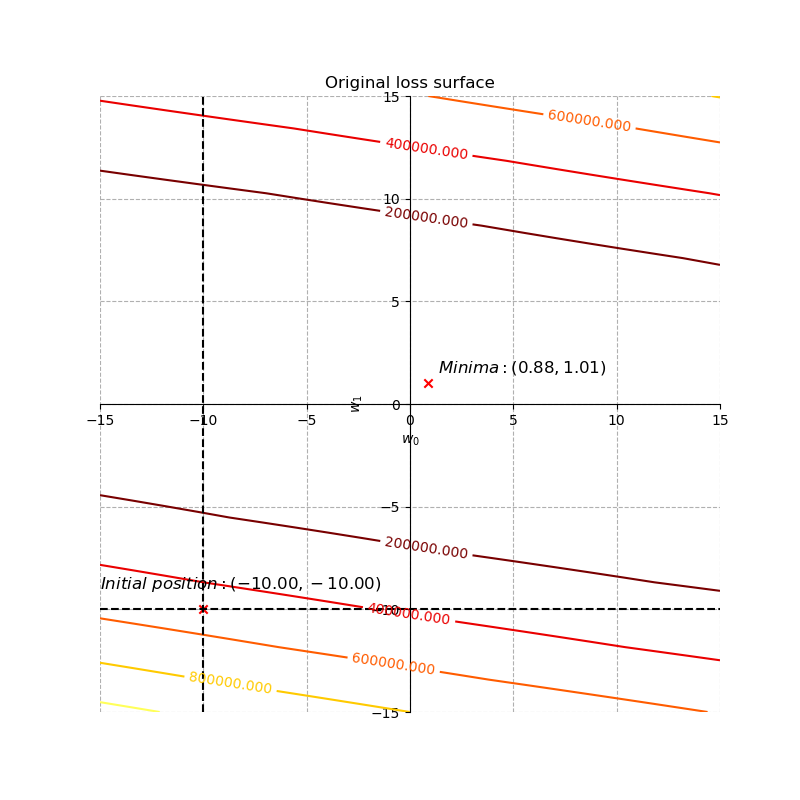

<IPython.core.display.Javascript object>


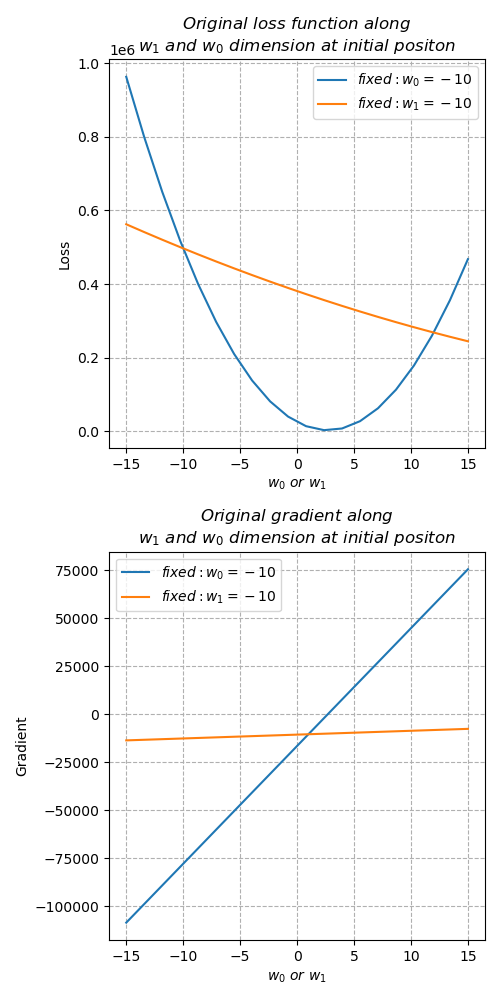

<IPython.core.display.Javascript object>


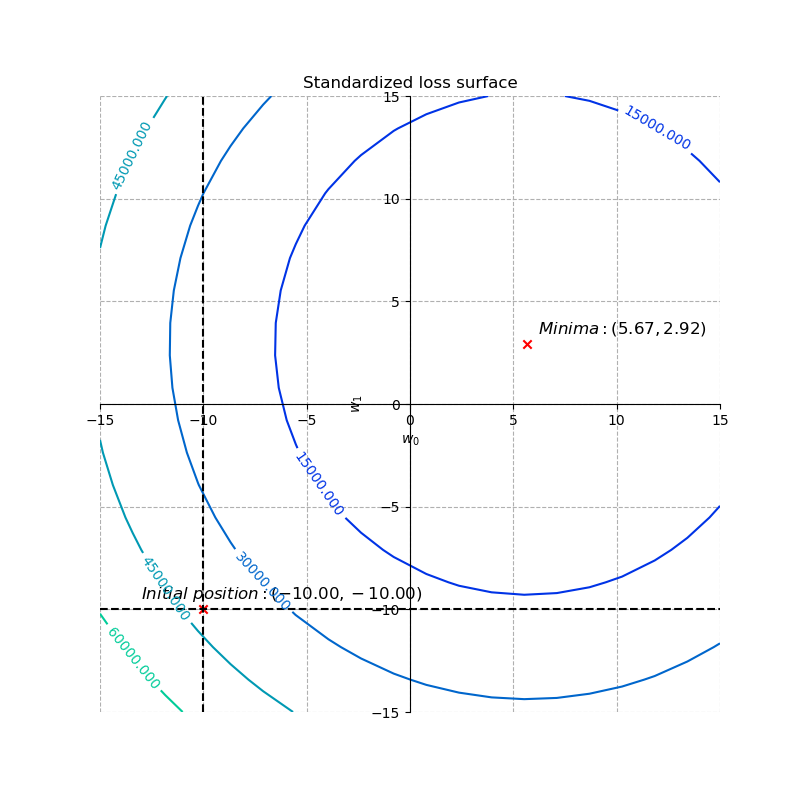

<IPython.core.display.Javascript object>


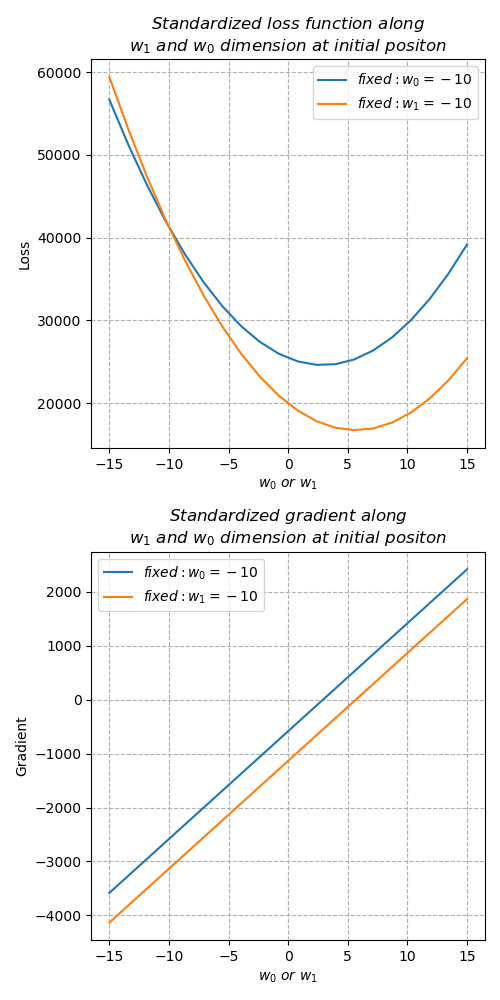

In [21]:
# 要对原始的匿名函数修改一下，不然不好plot_surface
f_loss = lambda w: (y - X @ w).transpose(0,2,1) @ (y - X @ w)
f_loss_scaled = lambda w: (y - X_scaled @ w).transpose(0,2,1) @ (y - X_scaled @ w)

# original 
# ************************************************
resolution = 20
w_range = np.linspace(-15,15,resolution)
w0,w1 = np.meshgrid(w_range, w_range)
w = np.dstack((w0, w1)).reshape(-1,2,1)
y_loss = f_loss(w).reshape(resolution,-1)

# contour
plt.figure(figsize=(8,8))
ax = plt.axes()
plt.grid(True, linestyle='--')
CS = plt.contour(w0, w1, y_loss,5,cmap='hot')
plt.clabel(CS, inline=1, fontsize=10)

# two points
plt.scatter(current_position[0],current_position[1],marker='x',color='red')
plt.annotate(f'$Minima:({current_position[0][0]:.2f},{current_position[1][0]:.2f})$', 
             xy=(current_position[0]+0.5,current_position[1]+0.5),
             size=12)

plt.scatter(initial_position[0],initial_position[1],marker='x',color='red')
plt.annotate(f'$Initial\ position:({initial_position[0][0]:.2f},{initial_position[1][0]:.2f})$', 
             xy=(initial_position[0]-5,initial_position[1]+1),
            size=12)

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Original loss surface')
plt.xlim(-15,15)
plt.ylim(-15,15)

ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 2 gradient line
w_ydir = np.linspace(-15,15,20)
w_xdir = np.linspace(-15,15,20)
plt.plot(np.ones(w_ydir.size)*initial_position[0],w_ydir,linestyle='--',color='black')
plt.plot(w_xdir,np.ones(w_xdir.size)*initial_position[1],linestyle='--',color='black')

# cross section
plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
loss_ydir = []
for w in w_ydir:
    loss_ydir.append(loss(np.array([initial_position[0],w]).reshape(-1,1)).flatten())
plt.plot(w_ydir,loss_ydir,label='$fixed: w_0 = -10$')

loss_xdir = []
for w in w_xdir:
    loss_xdir.append(loss(np.array([w,initial_position[1]]).reshape(-1,1)).flatten())
plt.plot(w_xdir,loss_xdir,label='$fixed: w_1 = -10$')

plt.xlabel('$w_0 \ or \ w_1$')
plt.ylabel('Loss')
plt.title('$Original\ loss\ function\ along\ $\n$w_1\ and\ w_0\ dimension\ at\ initial\ positon$')
plt.legend()
plt.grid(True, linestyle='--')

# gradient in two dircetion
plt.subplot(2,1,2)
dloss_ydir = []
for w in w_ydir:
    dloss_ydir.append(dloss(np.array([initial_position[0],w]).reshape(-1,1))[1])
plt.plot(w_ydir,dloss_ydir,label='$fixed: w_0 = -10$')

dloss_xdir = []
for w in w_xdir:
    dloss_xdir.append(dloss(np.array([w,initial_position[1]]).reshape(-1,1))[0])
plt.plot(w_xdir,dloss_xdir,label='$fixed: w_1 = -10$')

plt.xlabel('$w_0 \ or \ w_1$')
plt.ylabel('Gradient')
plt.title('$Original\ gradient\ along\ $\n$w_1\ and\ w_0\ dimension\ at\ initial\ positon$')
plt.legend()
plt.grid(True, linestyle='--')

plt.tight_layout()
# ****************************************************


# standardized 
# ************************************************
resolution = 20
w_range = np.linspace(-15,15,resolution)
w0,w1 = np.meshgrid(w_range, w_range)
w = np.dstack((w0, w1)).reshape(-1,2,1)
y_loss_scaled = f_loss_scaled(w).reshape(resolution,-1)

# contour
plt.figure(figsize=(8,8))
ax = plt.axes()
plt.grid(True, linestyle='--')
CS = plt.contour(w0, w1, y_loss_scaled,5,cmap='winter')
plt.clabel(CS, inline=1, fontsize=10)

# two points
plt.scatter(current_position_scaled[0],current_position_scaled[1],marker='x',color='red')
plt.annotate(f'$Minima:({current_position_scaled[0][0]:.2f},{current_position_scaled[1][0]:.2f})$', 
             xy=(current_position_scaled[0]+0.5,current_position_scaled[1]+0.5),
             size=12)


plt.scatter(initial_position[0],initial_position[1],marker='x',color='red')
plt.annotate(f'$Initial\ position:({initial_position[0][0]:.2f},{initial_position[1][0]:.2f})$', 
             xy=(initial_position[0]-3,initial_position[1]+0.5),
            size=12)

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Standardized loss surface')


ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# two gradient lines
w_ydir_std = np.linspace(-15,15,20)
w_xdir_std = np.linspace(-15,15,20)
plt.plot(np.ones(w_ydir_std.size)*initial_position[0],w_ydir,linestyle='--',color='black')
plt.plot(w_xdir_std,np.ones(w_xdir_std.size)*initial_position[1],linestyle='--',color='black')

# cross section
plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
loss_ydir_std = []
for w in w_ydir:
    loss_ydir_std.append(loss_scaled(np.array([initial_position[0],w]).reshape(-1,1)).flatten())
plt.plot(w_ydir_std,loss_ydir_std,label='$fixed: w_0 = -10$')

loss_xdir_std = []
for w in w_xdir:
    loss_xdir_std.append(loss_scaled(np.array([w,initial_position[1]]).reshape(-1,1)).flatten())
plt.plot(w_xdir_std,loss_xdir_std,label='$fixed: w_1 = -10$')

plt.xlabel('$w_0 \ or \ w_1$')
plt.ylabel('Loss')
plt.title('$Standardized\ loss\ function\ along\ $\n$w_1\ and\ w_0\ dimension\ at\ initial\ positon$')
plt.legend()
plt.grid(True, linestyle='--')

# gradient in two dircetion
plt.subplot(2,1,2)
dloss_ydir_std = []
for w in w_ydir:
    dloss_ydir_std.append(dloss_scaled(np.array([initial_position[0],w]).reshape(-1,1))[1])
plt.plot(w_ydir_std,dloss_ydir_std,label='$fixed: w_0 = -10$')

dloss_xdir_std = []
for w in w_xdir:
    dloss_xdir_std.append(dloss_scaled(np.array([w,initial_position[1]]).reshape(-1,1))[0])
plt.plot(w_xdir_std,dloss_xdir_std,label='$fixed: w_1 = -10$')



plt.xlabel('$w_0 \ or \ w_1$')
plt.ylabel('Gradient')
plt.title('$Standardized\ gradient\ along\ $\n$w_1\ and\ w_0\ dimension\ at\ initial\ positon$')
plt.legend()
plt.grid(True, linestyle='--')

plt.tight_layout()
# ****************************************************



# dloss

<IPython.core.display.Javascript object>


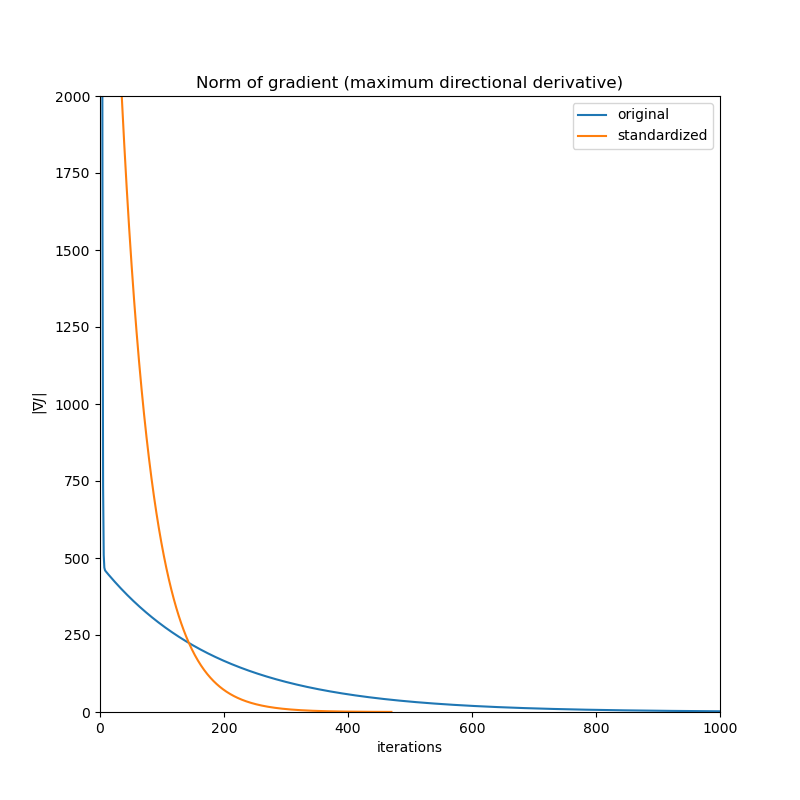

<IPython.core.display.Javascript object>


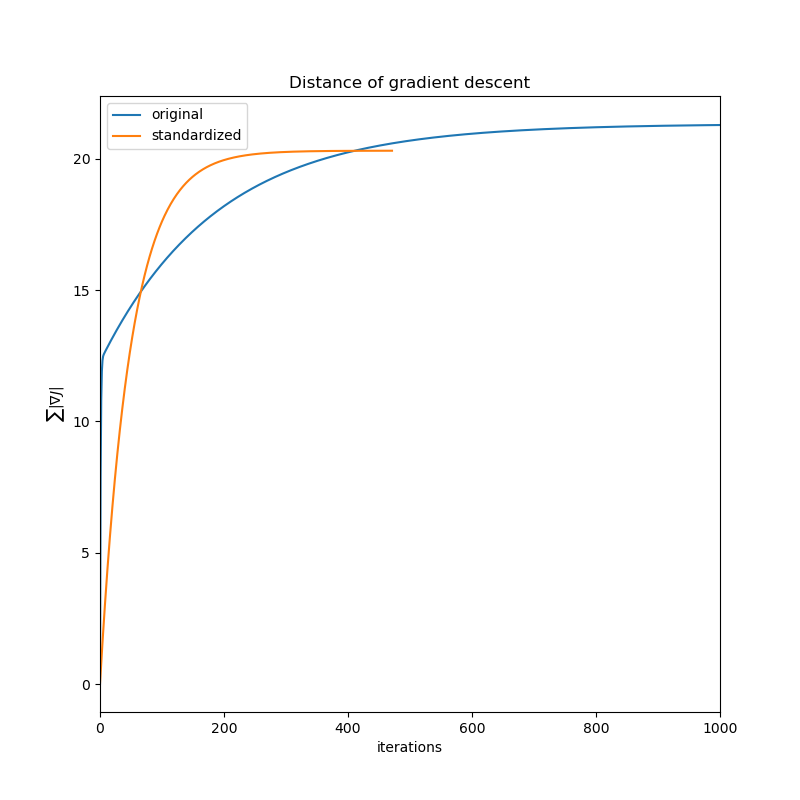

(0.0, 1000.0)

In [22]:
plt.figure(figsize=(8,8))

dloss_array_x = []
itr = np.arange(len(history))
for position,_,_ in history:
    dloss_array_x.append(dloss(position)[0])
# plt.plot(itr, dloss_array_x,label='original')

dloss_array_y = []
itr = np.arange(len(history))
for position,_,_ in history:
    dloss_array_y.append(dloss(position)[1])
# plt.plot(itr, dloss_array_y,label='original')



dloss_array_scaled_x = []
itr_scaled = np.arange(len(history_scaled))
for position,_,_ in history_scaled:
    dloss_array_scaled_x.append(dloss_scaled(position)[0])
# plt.plot(itr_scaled, dloss_array_scaled_x,label='standardized')


dloss_array_scaled_y = []
itr_scaled = np.arange(len(history_scaled))
for position,_,_ in history_scaled:
    dloss_array_scaled_y.append(dloss_scaled(position)[1])
# plt.plot(itr_scaled, dloss_array_scaled_y,label='standardized')







#  Directional derivative
abs_grad = np.sqrt(np.power(dloss_array_x,2) + np.power(dloss_array_y,2))
plt.plot(itr, abs_grad,label='original')

abs_grad_scaled = np.sqrt(np.power(dloss_array_scaled_x,2) + np.power(dloss_array_scaled_y,2))
plt.plot(itr_scaled, abs_grad_scaled,label='standardized')

plt.legend()
plt.title('Norm of gradient (maximum directional derivative)')
plt.xlabel('iterations')
plt.ylabel(r'$|\nabla J|$')
plt.xlim(0,1000)
plt.ylim(0,2000)



# #  Integral of Directional derivative
plt.figure(figsize=(8,8))
Integral_grad = np.cumsum(abs_grad)*learning_rate
plt.plot(np.arange(len(history)+1), np.insert(Integral_grad,0,0),label='original')

Integral_grad_scaled = np.cumsum(abs_grad_scaled)*learning_rate
plt.plot(np.arange(len(history_scaled)+1), np.insert(Integral_grad_scaled,0,0),label='standardized')

plt.legend()
plt.title('Distance of gradient descent')
plt.xlabel('iterations')
plt.ylabel(r'$\sum{|\nabla J|}$')
plt.xlim(0,1000)



# zusammen

In [23]:
# plt.figure(figsize=(8,8))
# plt.plot(w_ydir,dloss_ydir,label='$fixed: w_0 = -2$',color = 'red')
# plt.plot(w_xdir,dloss_xdir,label='$fixed: w_1 = 2$',color = 'blue')
# plt.plot(w_ydir,dloss_ydir_std,label='$fixed: w_0 = -2$, std',color = 'red',linestyle='-.')
# plt.plot(w_xdir,dloss_xdir_std,label='$fixed: w_1 = 2$, std',color = 'blue',linestyle='-.')

# # initial position
# w_dash_y = np.linspace(-10000,10000,10)
# plt.plot(np.ones(w_dash_y.size)*initial_position[0],w_dash_y,linestyle='--',color='grey')


# plt.scatter(initial_position,dloss_scaled(initial_position).flatten())
# plt.scatter(initial_position,dloss(initial_position).flatten())




# plt.xlabel('$w_0 \ or \ w_1$')
# plt.ylabel('Gradient')
# plt.title('$Original\ vs.\ standardized:\ $\n$gradient\ along\ w_1\ and\ w_0\ dimension\ at\ initial\ positon$')
# plt.legend()
# plt.ylim(-10000,10000)
# plt.grid(True, linestyle='--')

# contour

<IPython.core.display.Javascript object>


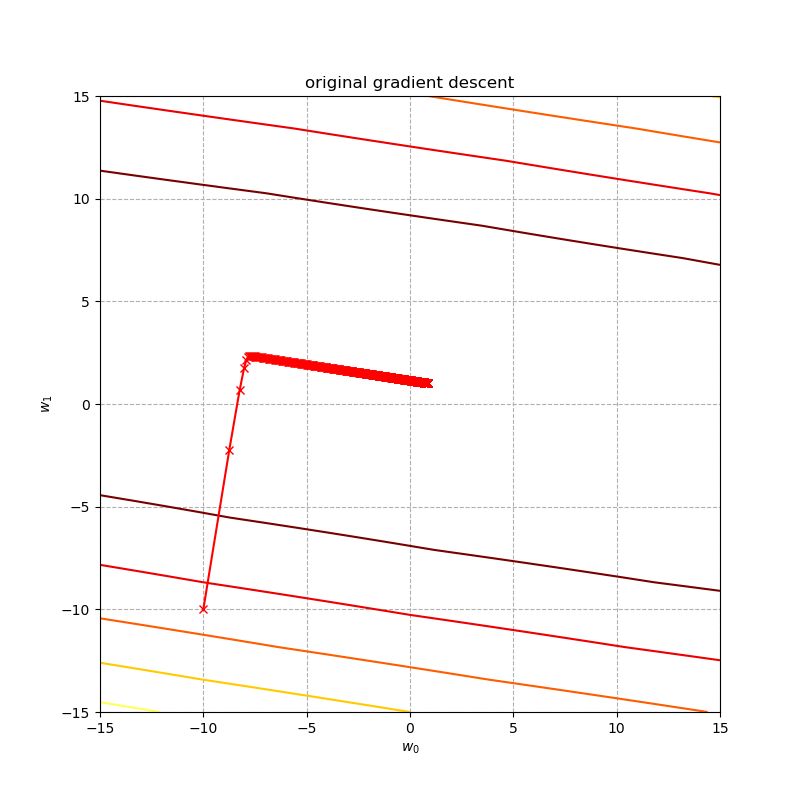

<IPython.core.display.Javascript object>


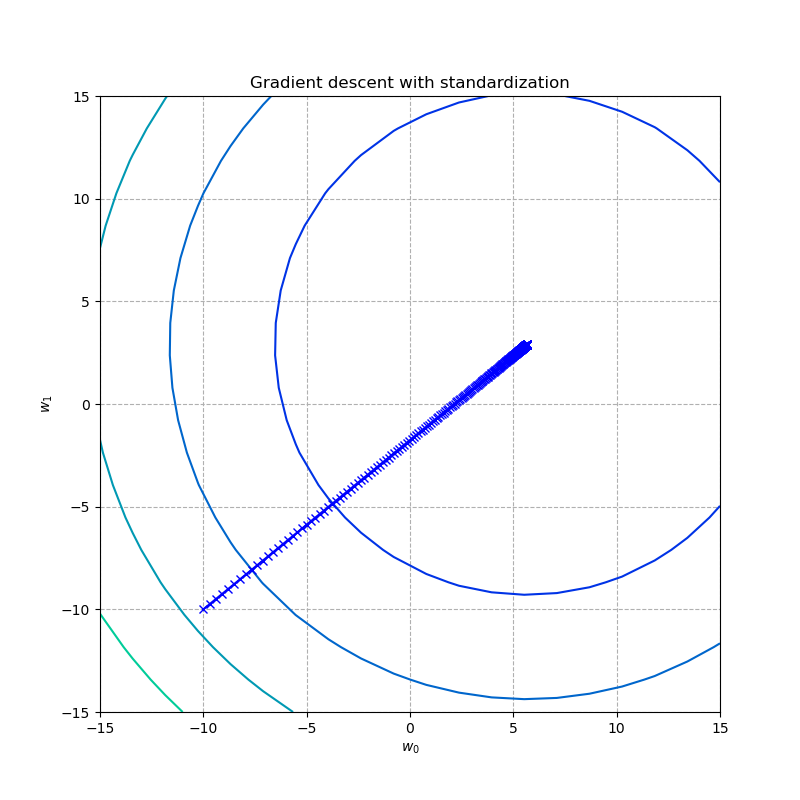

Text(0.5, 1.0, 'Gradient descent with standardization')

In [24]:

f_loss = lambda w: (y - X @ w).transpose(0,2,1) @ (y - X @ w)
f_loss_scaled = lambda w: (y - X_scaled @ w).transpose(0,2,1) @ (y - X_scaled @ w)
# f_loss_scaled = lambda w: (y - X_scaled @ (w+np.array((5551-100,8883-100)).reshape(2,1))).transpose(0,2,1) @ (y - X_scaled @ (w+np.array((5551-100,8883-100)).reshape(2,1)))




# original 
# ************************************************
resolution = 20
w_range = np.linspace(-15,15,resolution)
w0,w1 = np.meshgrid(w_range, w_range)
w = np.dstack((w0, w1)).reshape(-1,2,1)
y_loss = f_loss(w).reshape(resolution,-1)

plt.figure(figsize=(8,8))
plt.grid(True, linestyle='--')
plt.contour(w0, w1, y_loss,5,cmap='hot')

W0 = []
W1 = []
f_array = []
i = 0
for current_position,f,_ in history:
    if i%1 == 0:
        W0.append(current_position[0])
        W1.append(current_position[1])
        f_array.append(float(f))
    i += 1
plt.plot(W0, W1,color='red',marker='x')

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('original gradient descent')







# standardized 
# ***************************************************
resolution = 20
w_range = np.linspace(-15,15,resolution)
w0,w1 = np.meshgrid(w_range, w_range)
w = np.dstack((w0, w1)).reshape(-1,2,1)
y_loss_scaled = f_loss_scaled(w).reshape(resolution,-1)

plt.figure(figsize=(8,8))
plt.grid(True, linestyle='--')
plt.contour(w0, w1, y_loss_scaled,5,cmap='winter')

W0_scaled = []
W1_scaled = []
f_array_scaled = []
j = 0
for current_position_scaled,f_scaled,_ in history_scaled:
    if j%1 == 0:
        W0_scaled.append(current_position_scaled[0])
        W1_scaled.append(current_position_scaled[1])
        f_array_scaled.append(float(f_scaled))
    j += 1
plt.plot(W0_scaled, W1_scaled,color='blue',marker='x')

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Gradient descent with standardization')






# plot loss function in 3D

<IPython.core.display.Javascript object>


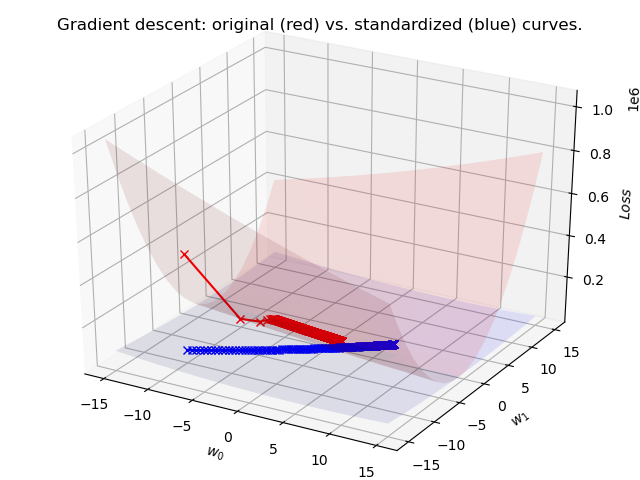

Text(0.5, 0.92, 'Gradient descent: original (red) vs. standardized (blue) curves.')

In [25]:
from mpl_toolkits.mplot3d import Axes3D

resolution = 20
w_range_0 = np.linspace(-15,15,resolution)
w_range_1 = np.linspace(-15,15,resolution)
w0,w1 = np.meshgrid(w_range_0, w_range_1)


f_loss = lambda w: (y - X @ w).transpose(0,2,1) @ (y - X @ w)
f_loss_scaled = lambda w: (y - X_scaled @ w).transpose(0,2,1) @ (y - X_scaled @ w)
# f_loss_scaled = lambda w: (y - X_scaled @ (w+np.array((5551-100,8883-100)).reshape(2,1))).transpose(0,2,1) @ (y - X_scaled @ (w+np.array((5551-100,8883-100)).reshape(2,1)))


w = np.dstack((w0, w1)).reshape(-1,2,1)
y_loss = f_loss(w).reshape(resolution,-1)
y_loss_scaled = f_loss_scaled(w).reshape(resolution,-1)

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(w0,w1,y_loss,alpha=0.1,color='red')
ax.plot_surface(w0,w1,y_loss_scaled,alpha=0.1,color='blue')

# ax.contour(w0, w1, y_loss, zdir='z',offset=0,cmap='hot')
# ax.contour(w0, w1, y_loss_scaled, zdir='z',offset=0,cmap='winter')


W0 = []
W1 = []
f_array = []
i = 0
for current_position,f,_ in history:
    if i%1 == 0:
        W0.append(current_position[0])
        W1.append(current_position[1])
        f_array.append(float(f))
    i += 1
ax.plot(W0, W1,f_array,color='red',marker='x')


W0_scaled = []
W1_scaled = []
f_array_scaled = []
j = 0
for current_position_scaled,f_scaled,_ in history_scaled:
    if j%1 == 0:
        W0_scaled.append(current_position_scaled[0])
        W1_scaled.append(current_position_scaled[1])
        f_array_scaled.append(float(f_scaled))
    j += 1
ax.plot(W0_scaled, W1_scaled,f_array_scaled,color='blue',marker='x')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$Loss$')
ax.set_title('Gradient descent: original (red) vs. standardized (blue) curves.')

# ax.scatter(W0,W1, 0,color='red',marker='x')

